<a href="https://colab.research.google.com/github/suriarasai/BEAD2024/blob/main/colab/00_IntroductionToPySparkCoLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This workshop walks through google CoLab sandbox. Google Colab is an online platform provided by Google that allows users to write and execute Python code through the browser. It's especially popular for machine learning and data analysis projects because it offers free access to certain computing resources, including GPUs and TPUs, which can significantly speed up processing times.

Colab notebooks are interactive documents, like Jupyter Notebooks (a flexible web-based interactive development environment for notebooks, code, and data.). They allow you to combine executable code, rich text, images, and other multimedia in a single document. Colab comes with pre-installed Python libraries for data analysis and visualization, such as NumPy, Pandas, Matplotlib, and Seaborn.
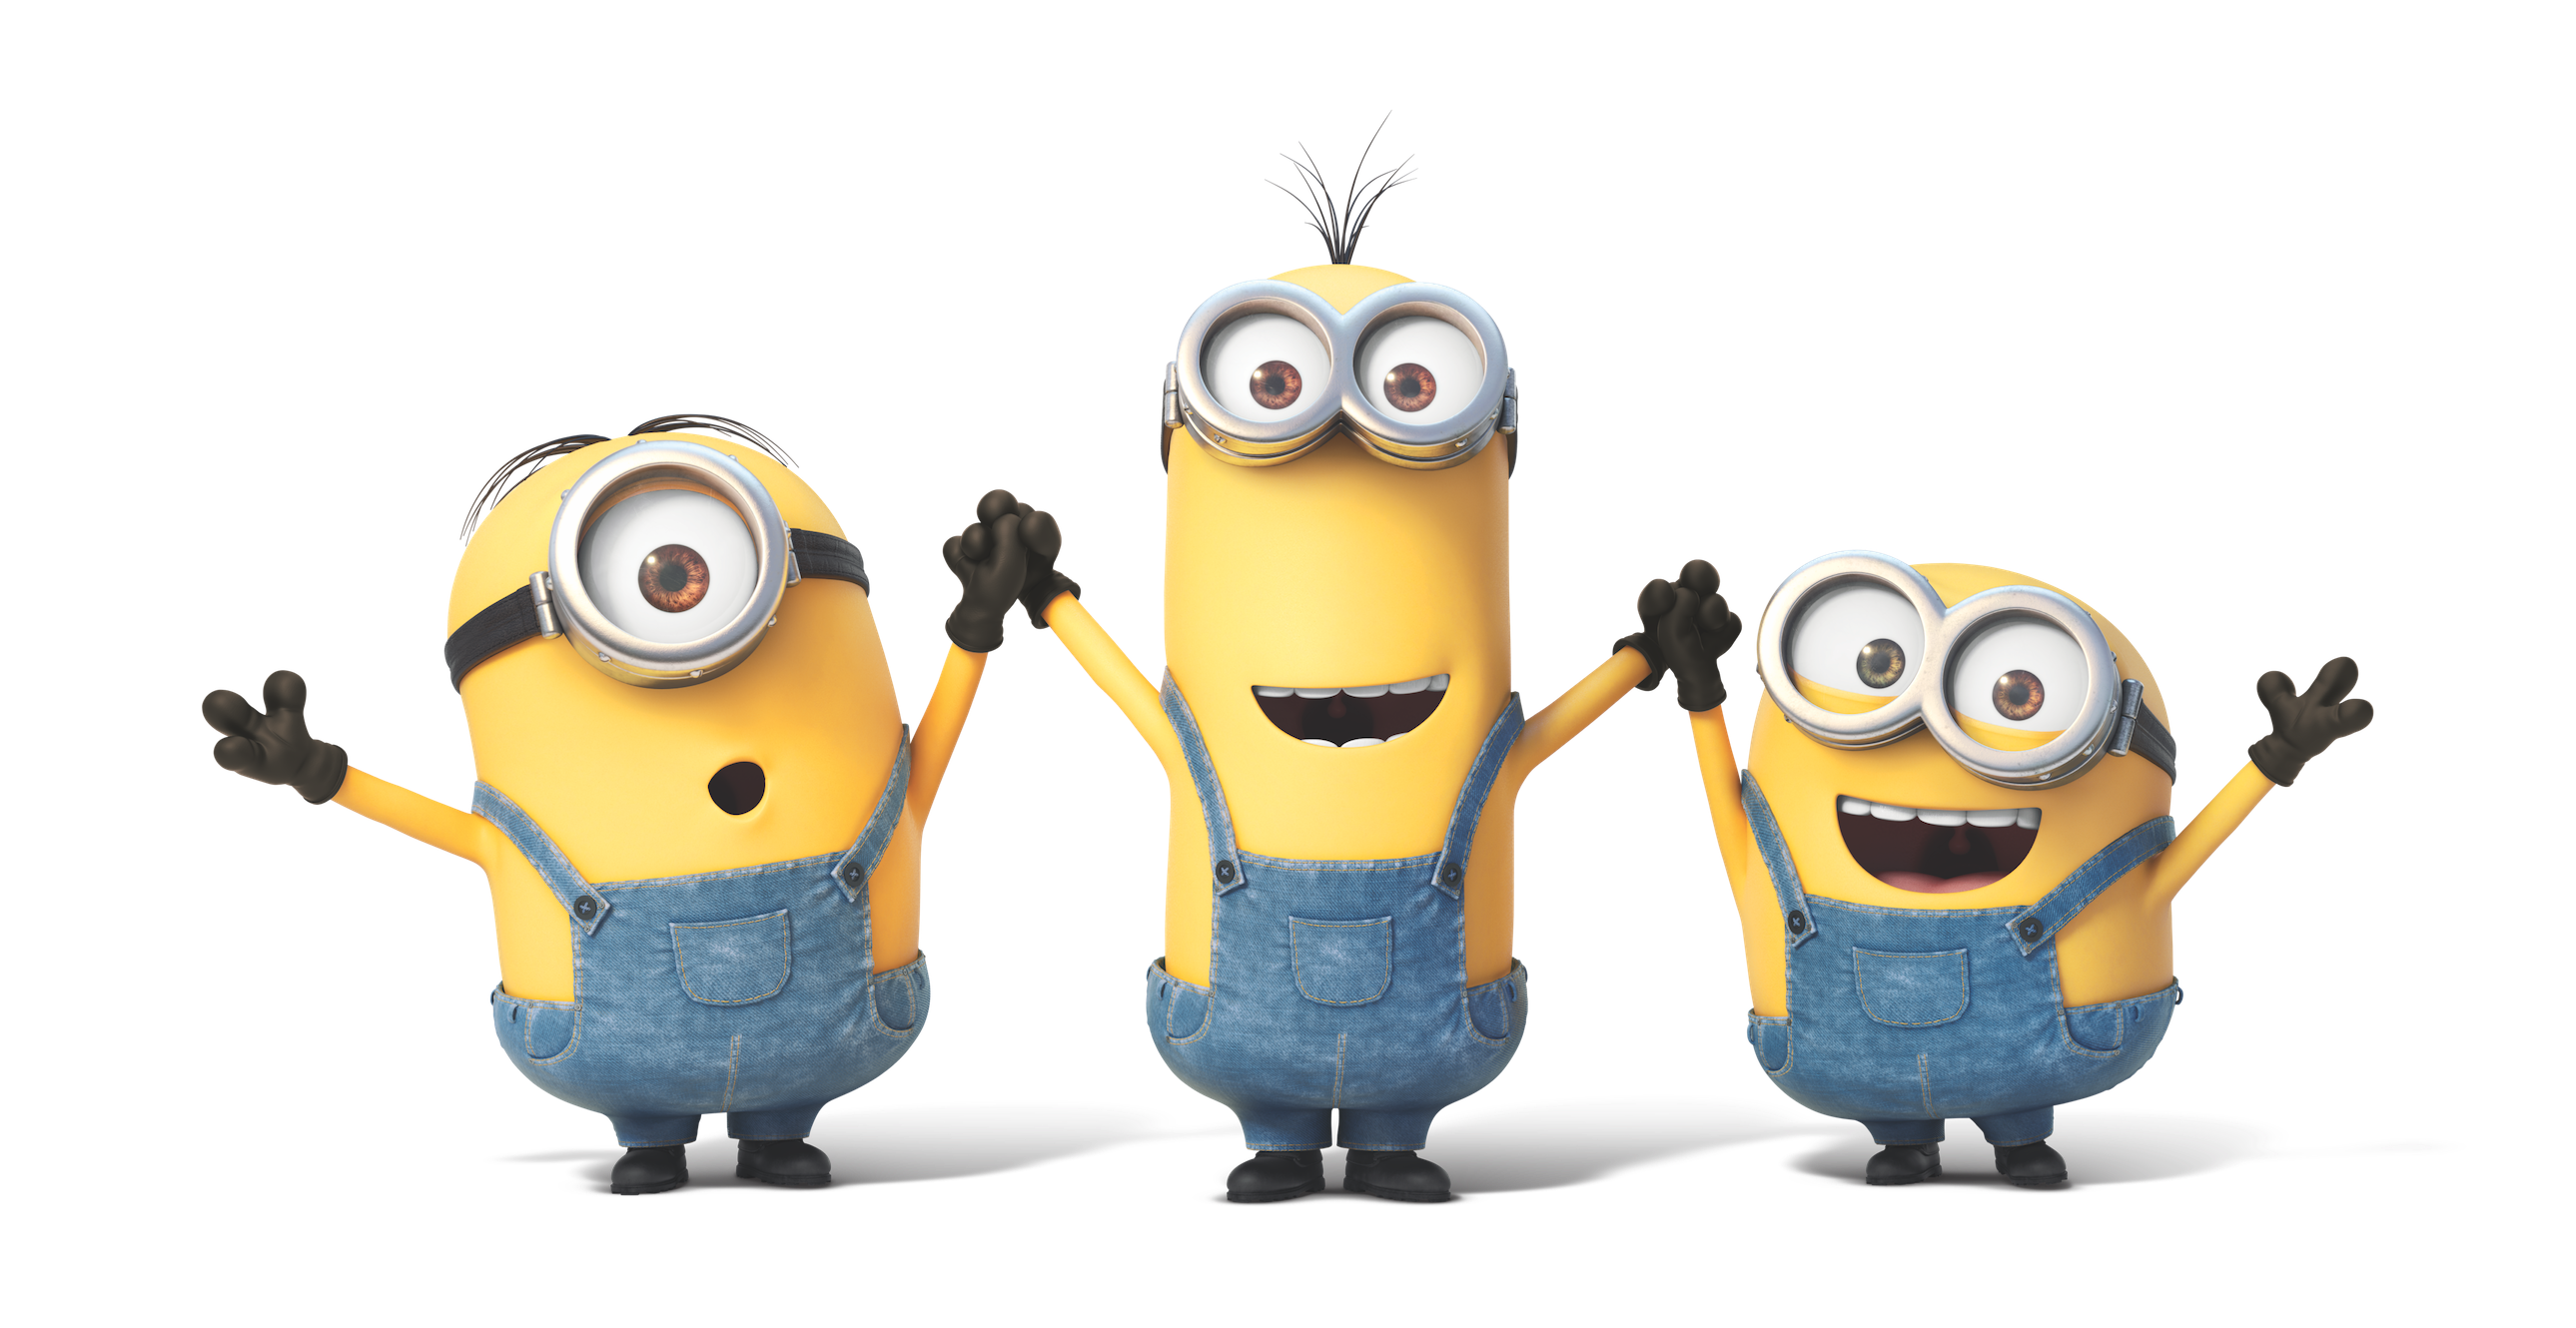
Colab is integrated with Google Drive, making it easy to share work, access various file types, and collaborate with others. It's widely used for educational purposes, as well as for research and development in various scientific disciplines.


# Getting Familiar with CoLab
Once you log into CoLab using your Gmail account and google drive, you would be able to play around with welcome notebook. The lecturer would introduce a few basics in the classroom.


## Executing Python Codes
With Colab you can harness the full power of popular Python libraries to analyze and visualize data.

Let us run a simple piece of python code to test in he code cell below.


In [ ]:
print("Hello, World!")

When you run this code, it will output the text Hello, World! to the console. This is a basic example often used to demonstrate the syntax for printing output in Python.

## Getting Started with PySpark
In this section we will see how to install pyspark and test PySpark codes in a Google Colaboratory notebook.

##  Installation

The first step involves installing pyspark.  The next step is to install findspark library.

*Note: the --ignore-install flag is used to ignore previous installations and use the latest one built alongside the allocated cluster.*

In [ ]:
# install pyspark using pip
!pip install --ignore-install -q pyspark
# install findspark using pip
!pip install --ignore-install -q findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 20.7 MB/s eta 0:00:00


Brilliant! So now that our plain pyspark installation is ready we can explore the Apache Spark basics from here....

# Spark Connect
Spark Connect introduced a decoupled client-server architecture that allows remote connectivity to Spark clusters using Data Frames or Data Sets. The separation between client and server allows Spark and its open ecosystem to be leveraged from everywhere. It can be embedded in modern data applications, in IDEs, Notebooks and programming languages.



 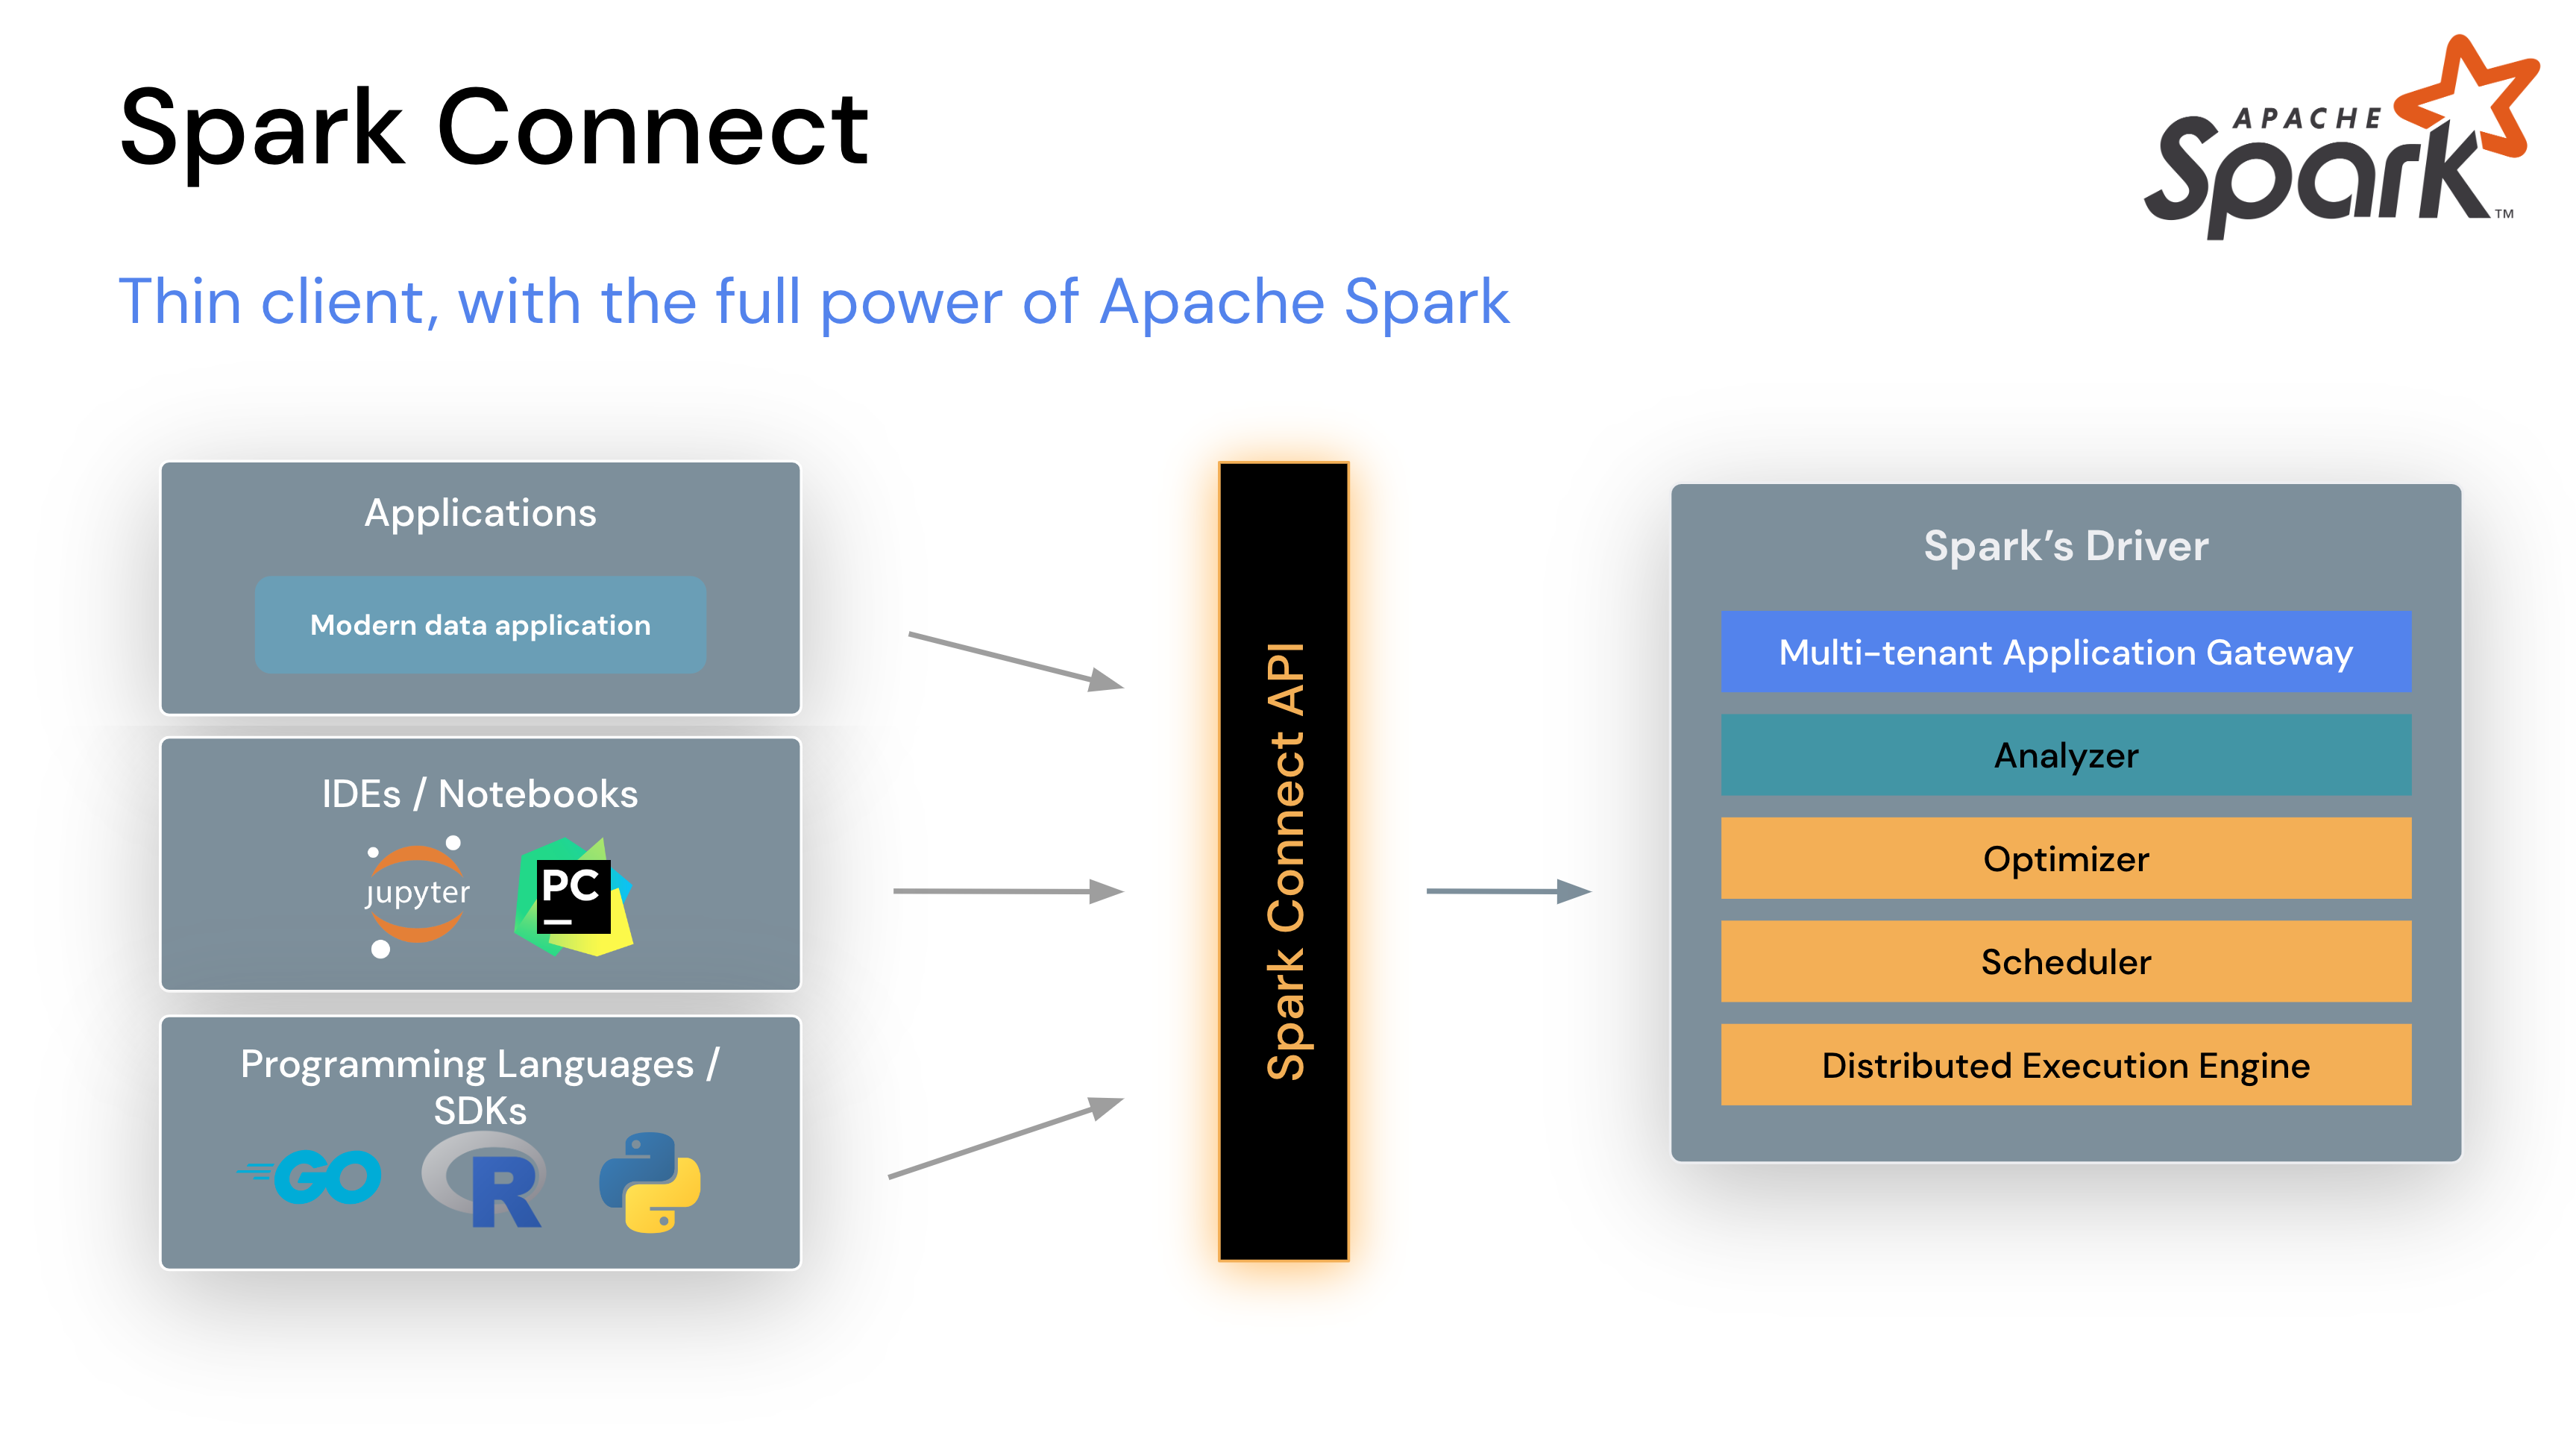

The Spark Connect client library is designed to simplify Spark application development. It is a thin API that can be embedded everywhere: in application servers, IDEs, notebooks, and programming languages. The Spark Connect client translates DataFrame operations into unresolved logical query plans which are encoded using protocol buffers. These are sent to the server using the gRPC framework. Results are streamed back to the client through gRPC as Apache Arrow-encoded row batches.

## SparkSession
When writing our code, we include the remote function with a reference to the previously installed Spark server by creating a Spark session. We import the basic object SparkSession from the Spark Framework. In PySpark, a Spark Session is a unified entry point into the framework for reading data, configuring the system, and managing various Spark services.

In PySpark, a Spark Session is created using the SparkSession.builder method. Here's an example:

In [1]:
from pyspark.sql import SparkSession
# import collections
spark = SparkSession.builder.master("local").appName("My First PySpark App").getOrCreate()

ModuleNotFoundError: No module named 'pyspark'


## Mount a Local File into CoLab Folder

Since a Colab notebook is hosted on Google's cloud servers, there's no direct access to files on your local drive (unlike a notebook hosted on your machine) or any other environment by default.

You have to download the wordcount.txt from [git](https://github.com/suriarasai/BEAD2024/blob/main/colab/wordcount.txt) and upload the file to your colab files folder (look for folder icon).

## Word Count

For testing the pyspark codes we will load a text file and count the number of lines in side using the framework.

Now let us try counting the number of lines in a given text file.

To count the number of lines in a file using PySpark, you first need to initialize a Spark session and then read the file into a RDD (Resilient Distributed Dataset). After that, you can use actions like count() to get the number of lines.

Then execute the below piece of code.

In [ ]:
# Assuming the file is named as wordcount.txt
file_rdd = spark.sparkContext.textFile("wordcount.txt")
line_count = file_rdd.count()
print(f"Number of lines in the file: {line_count}")


If everything goes well, the result is likely printed as 20 lines.

This is a basic example and might need to be adjusted depending on your specific file format and the environment where you're running PySpark on other files.

## Mounting Google Drive

You can use the drive module from google.colab to mount your entire Google Drive to Colab by executing the below code. This will provide us with an authentication link to connect to Google Drive. Choose the Google account whose Drive you want to mount. Allow Google Drive Stream access to your Google Account.

In [ ]:
# to read in data from a text file, first upload the data file into your google drive and then mount your google drive onto colab
from google.colab import drive
# to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True)
drive.mount('/content/drive', force_remount=True)


Once the Drive is mounted, we will get the message “Mounted at /content/drive”, and will be able to browse through the contents of your drive from the file-explorer pane.

Now you can interact with your Google Drive as if it was a folder in your Colab environment. Any changes to this folder will reflect directly in your Google Drive. You can read the files in your Google Drive as any other file.

You can even write directly to Google Drive from Colab using the usual file/directory operations.

## Mounting GitHub Notebook (OPTIONAL)
You can either clone an entire GitHub repository to your Colab environment or access individual CoLab files from their raw link.

You can clone a GitHub repository into your Colab environment in the same way as you would in your local machine, using git clone. Once the repository is cloned, refresh the file-explorer to browse through its contents.

In case you just have to work with a few files rather than the entire repository, you can load them directly from GitHub without needing to clone the repository to Colab.

## Limitations of Google Colab

One important caveat to remember while using Colab is that the files you upload in the default folder will not be available forever. Colab is a temporary environment with an idle timeout of 90 minutes and an absolute timeout of 12 hours. This means that the runtime will disconnect if it has remained idle for 90 minutes, or if it has been in use for 12 hours. On disconnection, we lose all  variables, states, installed packages, and files and will be connected to an entirely new and clean environment on reconnecting.

Also, Colab has a disk space limitation of 108 GB, of which only roughly 70 GB is available to the user. While this should be enough for most tasks, keep this in mind while working with larger datasets like image or video data.

Conclusion
Google Colab is a great tool for individuals who want to harness the power of high-end computing resources like GPUs, without being restricted by their price.

In this demo, we have gone through some essential aspects of Google Colab experience by reading external files in Google Colab, Installing PySpark and Mounting Google Drive.

Depending on your use-case, or how your data architecture is set-up, you can easily apply the above-mentioned methods to connect your data source directly to Colab.

💥 End of workshop - have fun coding! 💥
Cheers
Suria
🌞